# Métodos

## Bibliotecas

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Métodos Diretos

### Eliminação de Gauss Sem Pivot




In [ ]:
def gauss_elimination(A, B):
    n = len(B)

    # elimination phase
    for k in range(n - 1):
        for i in range(k + 1, n):
            try:
                if A[k, k] == 0:
                    raise ValueError("Elemento pivô é zero. A matriz pode ser singular ou precisar de troca de linhas.")

                m = A[i, k] / A[k, k]
                A[i, k] = 0

                # para evitar o erro de ponto flutuante
                m = round(m, 4)

                for j in range(k + 1, n):
                    A[i, j] -= m * A[k, j]
                B[i] -= m * B[k]

                #print("---------------------")
                #print(f"Após a etapa {k+1}:")
                #print("m: ")
                #print(m)
                #print("Matriz A:")
                #print(A)
                #print("Vetor B:")
                #print(B)
                #print("---------------------")
                #print("\n")
            except ValueError as e:
                print(f"Erro: {e}. Continuando para a próxima iteração.")
                continue

    return A, B


**Comentário:** Foi preciso colocar *m = round(m, 4)* na linha anterior as modificações na matriz A e no vetor B, pois estava apresentando erro devido aos cálculos em ponto fluente, onde operações com divisões e subtrações podem resultar em pequenos erros de arrendondamento

In [ ]:
def gauss_final(A,B,n):
  A_triangular, b_modificado = gauss_elimination(A, B)
  x_n = np.linalg.solve(A_triangular, b_modificado)
  return x_n

In [ ]:
# Exemplo de uso
A = np.array([[3, 2, 4],
              [1, 1, 2],
              [4, 3, -2]], dtype=float)

B = np.array([1, 2, 3], dtype=float)
n = len(B)

# Configurando o número de casas decimais


x = gauss_final(A, B,n)

print("x solução:")
print(x)


x solução:
[-2.99940012  4.99910018 -0.        ]


### Eliminação de Gauss Com Piv

In [ ]:
def gauss_pivot(A, B):
    A = A.astype(float)
    B = B.astype(float)
    n = len(B)

    for k in range(n):
        # Encontra o maior valor absoluto na coluna k a partir da linha k
        pivo = np.abs(A[k:, k]).max()
        linhaPivo = np.abs(A[k:, k]).argmax() + k

        if A[linhaPivo, k] == 0:
            raise ValueError("Elemento pivô é zero. A matriz pode ser singular ou precisar de troca de linhas.")

        # Permuta as linhas
        if linhaPivo != k:
            A[[k, linhaPivo]] = A[[linhaPivo, k]]
            B[[k, linhaPivo]] = B[[linhaPivo, k]]

        # Eliminação Gaussiana
        for i in range(k+1, n):
            m = A[i, k] / A[k, k]
            A[i, k:] -= m * A[k, k:]
            B[i] -= m * B[k]

    return A, B

In [ ]:
def gauss_pivot_final(A,B,n):
  A_triangular, b_modificado = gauss_pivot(A, B)
  x_n = np.linalg.solve(A_triangular, b_modificado)
  return x_n

In [ ]:
# Exemplo de uso
A = np.array([[0.0002, 2.0],
              [2.0, 2.0]], dtype=float)

B = np.array([5.0, 6.0], dtype=float)
n = len(B)

# Configurando o número de casas decimais


x_n_pivo = gauss_pivot_final(A, B,n)

print("x solucao")
print(x_n_pivo)

x solucao
[0.50005001 2.49994999]


### Fatoração LU sem Pivotamento

In [ ]:
def lu_decomposition(A):
    n = A.shape[0]

    L = np.eye(n)  # Inicializa L como matriz identidade
    U = A.copy()   # Inicializa U como uma cópia de A

    for k in range(n):
        if U[k, k] == 0:
            raise ValueError("Zero pivot encountered.")

        for i in range(k+1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:] = U[i, k:] - L[i, k] * U[k, k:]
            # para evitar o erro de ponto flutuante
            U = np.around(U, 4)

    return L, U




In [ ]:
def LU_final(A,B):
  L, U = lu_decomposition(A)
  y = np.linalg.solve(L,B)
  x_n = np.linalg.solve(U, y)
  return x_n

In [ ]:
# Exemplo de uso
A = np.array([[3, 2, 4],
              [1, 1, 2],
              [4, 3, 2]], dtype=float)

B = np.array([1, 2, 3], dtype=float)

x = LU_final(A,B)

print("x solucao:")
print(x)

x solucao:
[-3.00033337  5.00050005  0.        ]


### Fatoração LU com pivotamento

In [ ]:
def lu_decomposition_with_pivoting(A):
    n = A.shape[0]

    L = np.eye(n)
    U = A.copy()
    P = np.eye(n)

    for k in range(n):
        # Encontra o índice do maior valor em módulo na coluna k
        pivot = np.argmax(np.abs(U[k:, k])) + k
        if U[pivot, k] == 0:
            raise ValueError("Zero pivot encountered.")

        # Troca as linhas em U e P
        U[[k, pivot]] = U[[pivot, k]]
        P[[k, pivot]] = P[[pivot, k]]
        #L[[k, pivot]] = L[[pivot, k]]
        #if k > 0:
        L[[k, pivot], :k] = L[[pivot, k], :k]

        for i in range(k+1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:] = U[i, k:] - L[i, k] * U[k, k:]

    return P, L, U




In [ ]:
def lu_decomposition_with_pivoting_final(A,B):
  P, L, U = lu_decomposition_with_pivoting(A)
  #Ly = Pb
  Pb = np.dot(P,B)
  print("Matriz Ly:")
  print(Pb)

  y = np.linalg.solve(L,Pb)
  print("Matriz y:")
  print(y)
  x_n_pivo = np.linalg.solve(U, y)

  return x_n_pivo

In [ ]:
# Exemplo de uso
A = np.array([[3, -4, 1],
              [1, 2, 2],
              [4, 0, -3]], dtype=float)

B = np.array([9, 3, -2], dtype=float)

x_n_pivo = lu_decomposition_with_pivoting_final(A, B)

print("x solucao:")
print(x_n_pivo)


Matriz Ly:
[-2.  9.  3.]
Matriz y:
[-2.   10.5   8.75]
x solucao:
[ 1. -1.  2.]


### Fatoração de Cholesky sem Pivotamento

In [ ]:
def cholesky_factor_withoutpivo(n, A):
    Det = 1
    Info = 0

    for j in range(n):
        Soma = 0
        for k in range(j):
            Soma += A[j, k] * A[j, k]

        t = A[j, j] - Soma
        if t > 0:
            A[j, j] = np.sqrt(t)
            r = 1 / A[j, j]
            Det *= t
        else:
            Info = j + 1
            print("Matriz não é definida positiva")
            return A, Det, Info

        for i in range(j + 1, n):
            Soma = 0
            for k in range(j):
                Soma += A[i, k] * A[j, k]

            A[i, j] = (A[i, j] - Soma) * r

    # Zerando a parte superior de A para visualizar L mais facilmente
    for j in range(n):
        for i in range(j+1, n):
            A[j, i] = 0

    return A

In [ ]:
def criterio_simetria(A):
  n = A.shape[0]
  for i in range(n):
    for j in range(i+1,n):
      if A[i,j] != A[j,i]:
        return False
  return True

In [ ]:
def cholesky_decomposition(n, A, B):
    try:
        simetria = criterio_simetria(A)
        if not simetria:
            raise ValueError("A matriz não é simétrica")

        L = cholesky_factor_withoutpivo(n, A)
        print("Matriz L:\n", L)
        y_L = np.linalg.solve(L, B)

        T_L = np.transpose(L)
        x_L = np.linalg.solve(T_L, y_L)
        print(f"Solução x_cholesky: {x_L}")
    except Exception as e:
        print(f"Erro: {e}")


In [ ]:
# Exemplo de uso
A = np.array([[1, 1, 0],
              [1, 2, -1],
              [0, -1, 3]], dtype=float)
n = A.shape[0]
B = np.array([2, 1, 5], dtype=float)
cholesky_decomposition(n, A, B)


Matriz L:
 [[ 1.          0.          0.        ]
 [ 1.          1.          0.        ]
 [ 0.         -1.          1.41421356]]
Solução x_cholesky: [1. 1. 2.]


### Fatoração de Cholesky com pivo

In [ ]:
def cholesky_factors(n, A):
    P = np.eye(n)  # Matriz de permutação
    Det = 1
    Info = 0

    for j in range(n):
        # Pivotamento: encontrar o índice com o maior valor diagonal
        max_index = np.argmax(np.abs(A[j:n, j])) + j

        # Trocar linhas e colunas
        if j != max_index:
            A[[j, max_index], :] = A[[max_index, j], :]
            A[:, [j, max_index]] = A[:, [max_index, j]]
            P[[j, max_index], :] = P[[max_index, j], :]

        Soma = 0
        for k in range(j):
            Soma += A[j, k] * A[j, k]

        t = A[j, j] - Soma
        if t > 0:
            A[j, j] = np.sqrt(t)
            r = 1 / A[j, j]
            Det *= t
        else:
            Info = j + 1
            print("Matriz não é definida positiva")
            return A, P, Det, Info

        for i in range(j + 1, n):
            Soma = 0
            for k in range(j):
                Soma += A[i, k] * A[j, k]

            A[i, j] = (A[i, j] - Soma) * r

    # Zerando a parte superior de A para visualizar L mais facilmente
    for j in range(n):
        for i in range(j + 1, n):
            A[j, i] = 0

    return A, P, Det, Info

In [ ]:
def cholesky_pivoting(n, A, B):
    try:
        simetria = criterio_simetria(A)
        if not simetria:
            raise ValueError("A matriz não é simétrica")

        # Calling cholesky_factors instead of itself recursively
        L, P, Det, Info = cholesky_factors(n, A.copy()) # Creating a copy of A to avoid modifying the original
        # Aplicando a matriz de permutação P ao vetor B
        B_permuted = P @ B

        # Resolvendo L y = B_permuted
        y = np.linalg.solve(L, B_permuted)

        # Resolvendo L^T x = y para obter x
        x = np.linalg.solve(L.T, y)
        print("Matriz L:\n", L)
        print("Matriz de Permutação P:\n", P)
        print("Determinante:", Det)
        print("Info:", Info)
        return x
    except Exception as e:
        print(f"Erro: {e}")

In [ ]:
# Exemplo de uso Cholesky pivotamento
A = np.array([[1, 1, 0],
              [1, 2, -1],
              [0, -1, 3]], dtype=float)
n = A.shape[0]
B = np.array([2, 1, 5], dtype=float)

x_cholesky = cholesky_pivoting(n, A, B)
print("Solução x_cholesky:", x_cholesky)

Matriz L:
 [[ 1.          0.          0.        ]
 [ 1.          1.          0.        ]
 [ 0.         -1.          1.41421356]]
Matriz de Permutação P:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Determinante: 2.0
Info: 0
Solução x_cholesky: [1. 1. 2.]


## Métodos Iterativos

### Análise de convergência

In [ ]:
def is_diagonally_dominant(A):
    """ Verifica se a matriz A é diagonalmente dominante """
    n = A.shape[0]
    for i in range(n):
        sum_row = sum(abs(A[i, j]) for j in range(n) if j != i)
        if abs(A[i, i]) < sum_row:
            return False
    return True

def spectral_radius(T):
    """ Calcula o raio espectral da matriz T """
    eigenvalues = np.linalg.eigvals(T)
    return max(abs(eigenvalues))

def analyze_convergence(A):
    """ Analisa as condições de convergência """
    n = A.shape[0]
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    T = np.dot(np.linalg.inv(D), (L + U))
    rho = spectral_radius(T)
    return is_diagonally_dominant(A), rho

In [ ]:
# Exemplo de uso:
A = np.array([[10, 2, 1],
              [1, 5, 1],
              [2, 3, 10]], dtype=float)

b = np.array([7, -8, 6], dtype=float)

x0 = np.zeros_like(b)
# Análise de convergência
is_dd, rho = analyze_convergence(A)
print("A matriz é diagonalmente dominante? {}".format('Sim' if is_dd else 'Não'))
print("Raio espectral da matriz de iteração: {}".format(rho))

A matriz é diagonalmente dominante? Sim
Raio espectral da matriz de iteração: 0.39433809125626185


### Gauss-Jacobi

In [ ]:
def jacobi(A, b, x0, Toler=0.05, IterMax=100):
    n = len(b)
    x = x0.copy()
    x_new = np.zeros_like(x)
    iter_list = []

    Iter = 0
    while True:
        Iter += 1
        for i in range(n):
            Soma = 0
            for j in range(n):
                if i != j:
                    Soma += A[i, j] * x[j]
            x_new[i] = (b[i] - Soma) / A[i, i]
        iter_list.append(x_new.copy())

        # Verifica a norma relativa
        NormaNum = 0
        NormaDen = 0
        for i in range(n):
            t = abs(x_new[i] - x[i])
            if t > NormaNum:
                NormaNum = t
            if abs(x_new[i]) > NormaDen:
                NormaDen = abs(x_new[i])
        NormaRel = NormaNum / NormaDen

        x = x_new.copy()

        print(f"Iteração {Iter}: x = {x}, NormaRel = {NormaRel}")

        # Critério de convergência
        if NormaRel <= Toler or Iter >= IterMax:
            break

    Info = 0 if NormaRel <= Toler else 1
    return x, Iter, Info, iter_list


In [ ]:
# Resolução usando Jacobi
try:
    x_jacobi, Iter_jacobi, Info, iter_jacobi = jacobi(A, b, x0,0.05, 100)
    print("Solução x:", x_jacobi)
    print("Número de iterações:", Iter_jacobi)
    print("Informação de convergência:", "Convergiu" if Info == 0 else "Não convergiu")
except ValueError as e:
    print("Erro:", e)

Iteração 1: x = [ 0.7 -1.6  0.6], NormaRel = 1.0
Iteração 2: x = [ 0.96 -1.86  0.94], NormaRel = 0.18279569892473121
Iteração 3: x = [ 0.978 -1.98   0.966], NormaRel = 0.060606060606060545
Iteração 4: x = [ 0.9994 -1.9888  0.9984], NormaRel = 0.016291230893000743
Solução x: [ 0.9994 -1.9888  0.9984]
Número de iterações: 4
Informação de convergência: Convergiu


### Gauss-Seidel

In [ ]:
def seidel(A, b, x0, Toler=0.05, IterMax=100):
    n = len(b)
    x = x0.copy()
    x_new = np.zeros_like(x)
    iter_list = []

    Iter = 0
    while True:
        Iter += 1
        NormaNum = 0
        NormaDen = 0

        for i in range(n):
            Soma = 0
            for j in range(n):
                if i != j:
                    Soma += A[i, j] * x[j]

            x_new[i] = x[i]
            x[i] = (b[i] - Soma) / A[i, i]
            t = abs(x_new[i] - x[i])
            if t > NormaNum:
                NormaNum = t
            if abs(x[i]) > NormaDen:
                NormaDen = abs(x[i])

        iter_list.append(x.copy())
        NormaRel = NormaNum / NormaDen

        print(f"Iteração {Iter}: x = {x}, NormaRel = {NormaRel}")

        # Critério de convergência
        if NormaRel <= Toler or Iter >= IterMax:
            break

    Info = 0 if NormaRel <= Toler else 1
    return x, Iter, Info, iter_list


In [ ]:
# Exemplo de uso:
A = np.array([[10, 2, 1],
              [1, 5, 1],
              [2, 3, 10]], dtype=float)

b = np.array([7, -8, 6], dtype=float)

x0 = np.zeros_like(b)
x_seidel, Iter_seidel, info, iter_seidel = seidel(A, b, x0)

print("\nSolução aproximada:", x_seidel)
print("Número de iterações:", Iter_seidel)

if info == 0:
    print("Convergiu.")
else:
    print("Não convergiu dentro do número máximo de iterações.")

Iteração 1: x = [ 0.7   -1.74   0.982], NormaRel = 1.0
Iteração 2: x = [ 0.9498   -1.98636   1.005948], NormaRel = 0.1257576672909241
Iteração 3: x = [ 0.9966772  -2.00052504  1.00082207], NormaRel = 0.02343244851361618

Solução aproximada: [ 0.9966772  -2.00052504  1.00082207]
Número de iterações: 3
Convergiu.


## Geração de Gráfico

In [ ]:
def plot_iterations_gs_jacobi(iter_jacobi, iter_seidel, inicio, fim, nro_pts):
    # Prepare x and y values for plotting
    iter_jacobi_x = [x[0] for x in iter_jacobi]
    iter_jacobi_y = [x[1] for x in iter_jacobi]

    iter_seidel_x = [x[0] for x in iter_seidel]
    iter_seidel_y = [x[1] for x in iter_seidel]

    # Plot Gauss-Jacobi iterations
    plt.plot(iter_jacobi_x, iter_jacobi_y, 'o-', label='Jacobi')

    # Plot Gauss-Seidel iterations
    plt.plot(iter_seidel_x, iter_seidel_y, 's-', label='Seidel')

    # Add lines for x and y axes
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Set axis limits
    plt.xlim(inicio, fim)
    plt.ylim(inicio, fim)

    # Add labels and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Iterações dos Métodos Gauss-Jacobi e Gauss-Seidel')

    # Add legend
    plt.legend()

    # Add grid
    plt.grid()

    # Show plot
    plt.show()



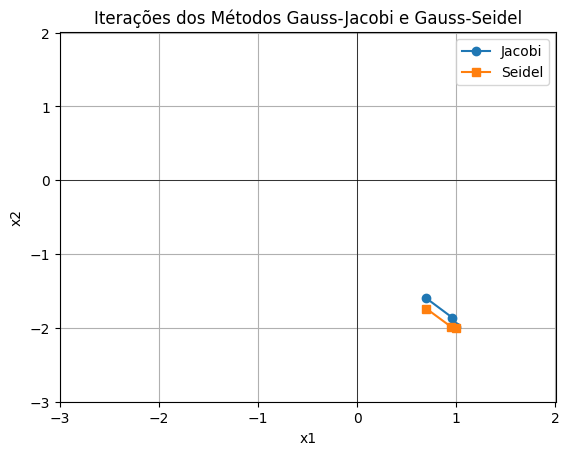

In [ ]:
# Definindo o intervalo e o número de pontos para o gráfico
inicio = min(np.min(iter_jacobi), np.min(iter_seidel)) - 1
fim = max(np.max(iter_jacobi), np.max(iter_seidel)) + 1
nro_pts = 100

# Gerando o gráfico
plot_iterations_gs_jacobi(iter_jacobi, iter_seidel, inicio, fim, nro_pts)

##  Sistemas de equações não lineares

### Método de Newton

In [ ]:
def newton(F, JF, x0, TOL, N):
    # Preliminares
    x = np.copy(x0).astype(np.float64)
    k = 0

    # Iterações
    while k < N:
        k += 1
        # Iteração de Newton
        delta = -np.linalg.solve(JF(x), F(x))
        x = x + delta
        # Critério de parada
        if np.linalg.norm(delta, np.inf) < TOL:
            return x

    raise NameError('Número máximo de iterações excedido.')

In [ ]:
# Definindo F e JF usando lambdas
F = lambda x: np.array([
    x[0]**2/3 + x[1]**2 - 1,   # Equação 1
    x[0]**2 + x[1]**2/4 - 1   # Equação 2
])

JF = lambda x: np.array([
    [2*x[0]/3, 2*x[1]],       # Derivadas parciais de f1
    [2*x[0], x[1]/2]          # Derivadas parciais de f2
])

# Ponto inicial
x0 = np.array([0.5, 0.5])
TOL = 1e-10
N = 100

try:
    sol = newton(F, JF, x0, TOL, N)
    print("Solução aproximada:", sol)
except NameError as e:
    print(e)

Solução aproximada: [0.90453403 0.85280287]


# Lista de Exercícios

##1. Considere os seguintes sistemas:

### a) Eliminação de Gauss sem Pivotamento Parcial

In [ ]:
# 1-a
A = np.array([[3, 2, 0],
              [1, 4, 1],
              [2, 5, 0]], dtype=float)

B = np.array([5, 6, 7], dtype=float)

n = len(B)

x = gauss_final(A, B,n)

print("x solução:")
print(x)

x solução:
[1.00004364 0.99993455 1.00031818]


In [ ]:
# 1-b
A = np.array([[-2, -2, 0],
              [1, 3, -1],
              [0,-1, 2]], dtype=float)

B = np.array([-1, 3, 1], dtype=float)

n = len(B)

# Configurando o número de casas decimais


x = gauss_final(A, B,n)

print("x solução:")
print(x)

x solução:
[-1.5  2.   1.5]


In [ ]:
# 1-c
A = np.array([[1, 2, 1],
              [2, 6, 0],
              [1, 0, 4]], dtype=float)

B = np.array([4, 8, 5], dtype=float)

n = len(B)

# Configurando o número de casas decimais


x = gauss_final(A, B,n)

print("x solução:")
print(x)

x solução:
[1. 1. 1.]


### a) Eliminação de Gauss com Pivotamento Parcial

In [ ]:
# 1-a-1
A = np.array([[3, 2, 0],
              [1, 4, 1],
              [2, 5, 0]], dtype=float)

B = np.array([5, 6, 7], dtype=float)

n = len(B)

# Configurando o número de casas decimais


x_n_pivo = gauss_pivot_final(A, B,n)

print("x solucao:")
print(x_n_pivo)

x solucao:
[1. 1. 1.]


In [ ]:
# 1-b
A = np.array([[-2, -2, 0],
              [1, 3, -1],
              [0,-1, 2]], dtype=float)

B = np.array([-1, 3, 1], dtype=float)

n = len(B)

# Configurando o número de casas decimais


x_n_pivo = gauss_pivot_final(A, B,n)

print("Matriz Triangular Superior A:")
print(x_n_pivo)

Matriz Triangular Superior A:
[-1.5  2.   1.5]


In [ ]:
# 1-c
A = np.array([[1, 2, 1],
              [2, 6, 0],
              [1, 0, 4]], dtype=float)

B = np.array([4, 8, 5], dtype=float)

n = len(B)

# Configurando o número de casas decimais


x_n_pivo = gauss_pivot_final(A, B,n)

print("x solucao:")
print(x_n_pivo)

x solucao:
[1. 1. 1.]


### b) Fatoração LU sem Pivotamento Parcial

In [ ]:
# 1-b-1
A = np.array([[3, 2, 0],
              [1, 4, 1],
              [2, 5, 0]], dtype=float)

B = np.array([5, 6, 7], dtype=float)

x = LU_final(A,B)

print("x solucao:")
print(x)

x solucao:
[1.00000988 0.99998518 1.00008273]


In [ ]:
# 1-b-2
A = np.array([[-2, -2, 0],
              [1, 3, -1],
              [0,-1, 2]], dtype=float)

B = np.array([-1, 3, 1], dtype=float)

x = LU_final(A,B)

print("x solucao:")
print(x)

x solucao:
[-1.5  2.   1.5]


In [ ]:
# 1-b-3
A = np.array([[1, 2, 1],
              [2, 6, 0],
              [1, 0, 4]], dtype=float)

B = np.array([4, 8, 5], dtype=float)

x = LU_final(A,B)

print("x solucao:")
print(x)

x solucao:
[1. 1. 1.]


### b) Fatoração LU com Pivotamento Parcial

In [ ]:
#1-b-1
A = np.array([[3, 2, 0],
              [1, 4, 1],
              [2, 5, 0]], dtype=float)

B = np.array([5, 6, 7], dtype=float)

x_n_pivo = lu_decomposition_with_pivoting_final(A, B)

print("x solucao:")
print(x_n_pivo)

Matriz Ly:
[5. 7. 6.]
Matriz y:
[5.         3.66666667 1.        ]
x solucao:
[1. 1. 1.]


In [ ]:
#1-b-2
A = np.array([[-2, -2, 0],
              [1, 3, -1],
              [0,-1, 2]], dtype=float)

B = np.array([-1, 3, 1], dtype=float)

x_n_pivo = lu_decomposition_with_pivoting_final(A, B)

print("x solucao:")
print(x_n_pivo)

Matriz Ly:
[-1.  3.  1.]
Matriz y:
[-1.    2.5   2.25]
x solucao:
[-1.5  2.   1.5]


In [ ]:
#1-b-3
A = np.array([[1, 2, 1],
              [2, 6, 0],
              [1, 0, 4]], dtype=float)

B = np.array([4, 8, 5], dtype=float)

x_n_pivo = lu_decomposition_with_pivoting_final(A, B)

print("x solucao:")
print(x_n_pivo)

Matriz Ly:
[8. 5. 4.]
Matriz y:
[ 8.          1.         -0.33333333]
x solucao:
[1. 1. 1.]


### c) Fatoração Cholesky sem Pivotamento Parcial.

In [ ]:
# 1-c-1
A = np.array([[3, 2, 0],
              [1, 4, 1],
              [2, 5, 0]], dtype=float)
n = A.shape[0]
B = np.array([5, 6, 7], dtype=float)

cholesky_decomposition(n, A, B)


Erro: A matriz não é simétrica


In [ ]:
# 1-c-2
A = np.array([[-2, -2, 0],
              [1, 3, -1],
              [0,-1, 2]], dtype=float)

B = np.array([-1, 3, 1], dtype=float)
n = A.shape[0]

cholesky_decomposition(n, A, B)

Erro: A matriz não é simétrica


In [ ]:
# 1-c-3
A = np.array([[1, 2, 1],
              [2, 6, 0],
              [1, 0, 4]], dtype=float)

B = np.array([4, 8, 5], dtype=float)
n = A.shape[0]

cholesky_decomposition(n, A, B)

Matriz L:
 [[ 1.          0.          0.        ]
 [ 2.          1.41421356  0.        ]
 [ 1.         -1.41421356  1.        ]]
Solução x_cholesky: [1. 1. 1.]


### c) Fatoração Cholesky com Pivotamento Parcial.

In [ ]:
# 1-c-1
A = np.array([[3, 2, 0],
              [1, 4, 1],
              [2, 5, 0]], dtype=float)

B = np.array([5, 6, 7], dtype=float)
n = A.shape[0]
x_cholesky = cholesky_pivoting(n, A, B)
print("Solução x_cholesky:", x_cholesky)

Erro: A matriz não é simétrica
Solução x_cholesky: None


In [ ]:
# 1-c-2
A = np.array([[-2, -2, 0],
              [1, 3, -1],
              [0,-1, 2]], dtype=float)

B = np.array([-1, 3, 1], dtype=float)
n = A.shape[0]
x_cholesky = cholesky_pivoting(n, A, B)
print("Solução x_cholesky:", x_cholesky)

Erro: A matriz não é simétrica
Solução x_cholesky: None


In [ ]:
# 1-c-3
A = np.array([[1, 2, 1],
              [2, 6, 0],
              [1, 0, 4]], dtype=float)

B = np.array([4, 8, 5], dtype=float)
n = A.shape[0]
x_cholesky = cholesky_pivoting(n, A, B)
print("Solução x_cholesky:", x_cholesky)

Matriz L:
 [[2.44948974 0.         0.        ]
 [0.81649658 0.57735027 0.        ]
 [0.         1.73205081 1.        ]]
Matriz de Permutação P:
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
Determinante: 1.9999999999999962
Info: 0
Solução x_cholesky: [1. 1. 1.]


## 2. Considere os seguintes sistemas:

### a) A matriz A pode ser decomposta em L.U.? Justifique.

A decomposição LULU (sem pivoteamento) existe para uma matriz AA se as submatrizes principais de AA são não-singulares (têm determinante diferente de zero).

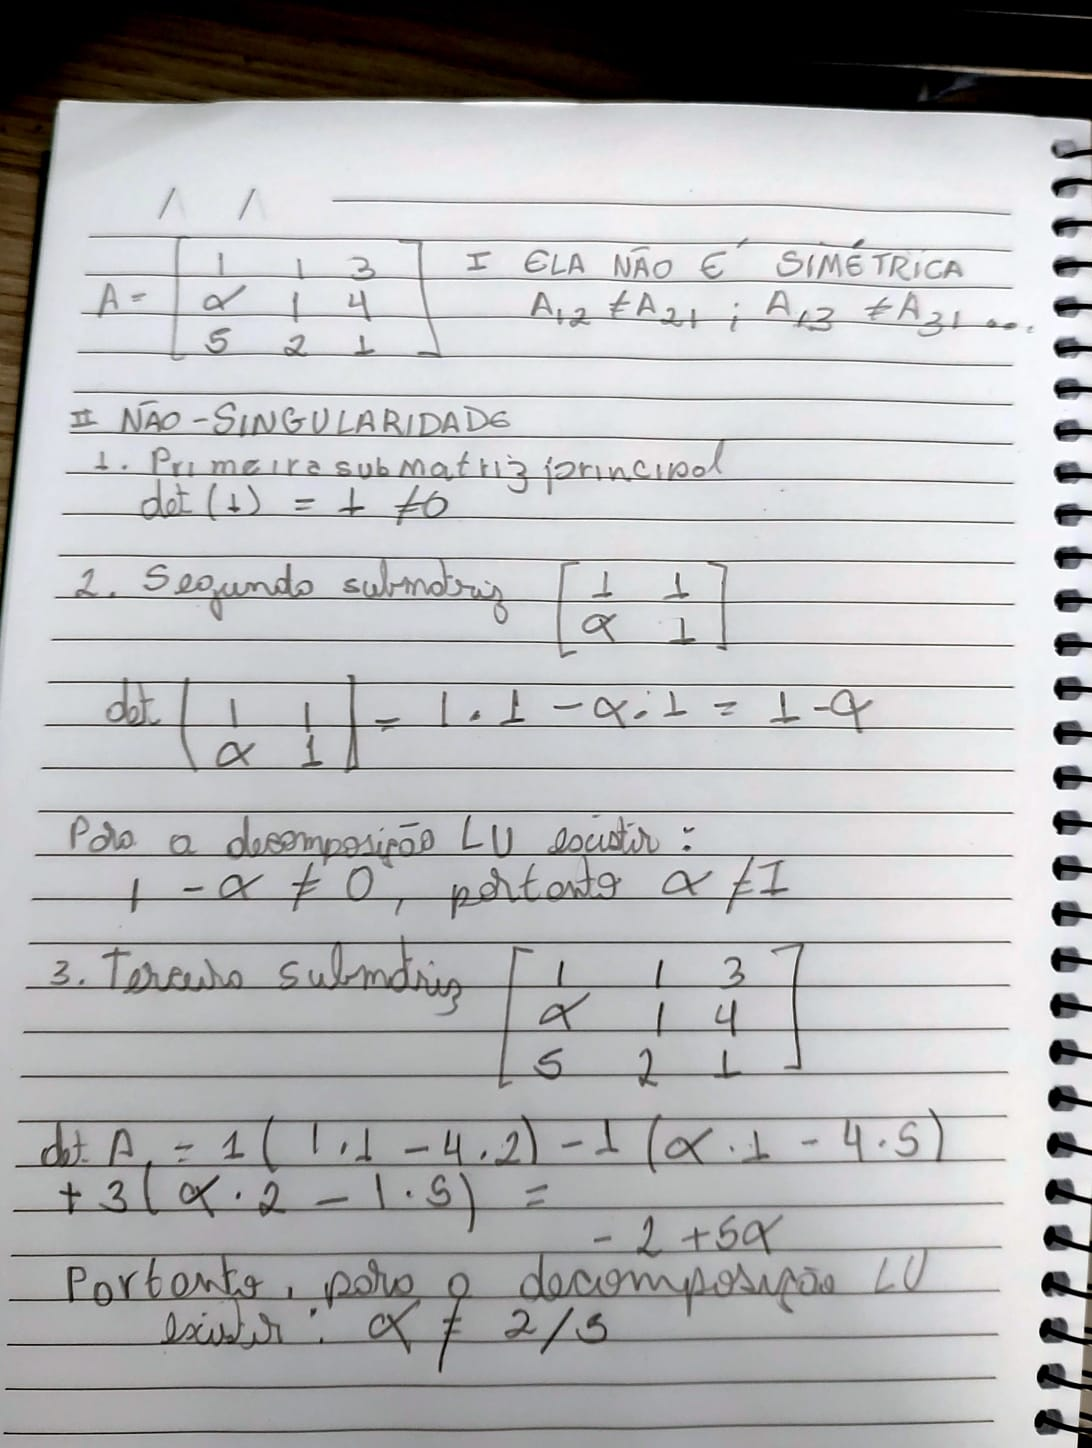

A matriz A pode ser decomposta em LU para todos os valores de α, exceto α=1 e α=2/5​.

### b) O sistema pode ser resolvido por Fatoração Cholesky? Justifique.

O sistema não pode ser resolvido por Fatoração Cholesky porque a matriz A não é simétrica.

### c) Considere α = 1 e resolva o sistema pelo Método de Eliminação de Gauss sem pivotamento.

In [ ]:
# 1-a
A = np.array([[1, 1, 3],
              [1, 1, 4],
              [5, 2, 1]], dtype=float)

B = np.array([-2, -3, 4], dtype=float)

n = len(B)

x = gauss_final(A, B,n)

print("x solução:")
print(x)

det_A = np.linalg.det(A)
det_A

Erro: Elemento pivô é zero. A matriz pode ser singular ou precisar de troca de linhas.. Continuando para a próxima iteração.
x solução:
[ 1. -0. -1.]


3.0000000000000004

Eliminação de Gauss com pivotamento.

In [ ]:
# 1-a-1
A = np.array([[1, 1, 3],
              [1, 1, 4],
              [5, 2, 1]], dtype=float)

B = np.array([-2, -3, 4], dtype=float)

n = len(B)

# Configurando o número de casas decimais


x_n_pivo = gauss_pivot_final(A, B,n)

print("x solucao:")
print(x_n_pivo)

x solucao:
[ 1.  0. -1.]


## 3. Considere o seguinte sistema de equações para determinar as concentrações c1,c2 e c3 (g/m3) numa série de 3 reatores como função da quantidade de massa à entrada de cada reator (termo independente do sistema em g):

a) Analise as condições de convergência

In [ ]:
A = np.array([[17, -2, -3],
              [-5, 21, -2],
              [-5, -5, 22]], dtype=float)

b = np.array([500, 200, 30], dtype=float)

# Ponto inicial especificado
x0 = np.array([34, 19, 13], dtype=float)
# Análise de convergência
is_dd, rho = analyze_convergence(A)
print("A matriz é diagonalmente dominante? {}".format('Sim' if is_dd else 'Não'))
print("Raio espectral da matriz de iteração: {}".format(rho))


A matriz é diagonalmente dominante? Sim
Raio espectral da matriz de iteração: 0.35227698999963036


**Diagonal dominante**: Uma matriz AA é diagonalmente dominante se, para cada linha ii, a magnitude do elemento da diagonal ∣a(ii)∣ é maior ou igual à soma das magnitudes de todos os outros elementos dessa linha ∑j≠i∣a(ij)∣

**Espectralidade**: O método de Jacobi convergirá se o raio espectral da matriz de iteração T for menor que 1

b) Aplique os métodos ao sistema

In [ ]:
# Resolução usando Jacobi
try:
    x, Iter, Info = jacobi(A, b, x0,0.0025,2)
    print("Solução x:", x)
    print("Número de iterações:", Iter)
    print("Informação de convergência:", "Convergiu" if Info == 0 else "Não convergiu")
except ValueError as e:
    print("Erro:", e)

Iteração 1: x = [33.94117647 18.85714286 13.40909091], NormaRel = 0.01205293839609262
Iteração 2: x = [33.99656226 18.88209829 13.36325439], NormaRel = 0.0016291585676886813
Erro: too many values to unpack (expected 3)


In [ ]:
# Aplicando Gauss-Seidel
try:
    x_seidel, Iter_seidel, Info_seidel = seidel(A, b, x0, Toler=0.0025, IterMax=2)
    print("\nSolução Gauss-Seidel x:", x_seidel)
    print("Número de iterações:", Iter_seidel)
    print("Informação de convergência:", "Convergiu" if Info_seidel == 0 else "Não convergiu")
except ValueError as e:
    print("Erro em Gauss-Seidel:", e)

Iteração 1: x = [33.94117647 18.84313725 13.3600713 ], NormaRel = 0.010608686518565131
Iteração 2: x = [33.98626402 18.88816489 13.38055203], NormaRel = 0.0013266404835143364
Erro em Gauss-Seidel: too many values to unpack (expected 3)


## 4. Considere o sistema:

### a) Aplique analítica e graficamente os métodos Gauss-Jacobi e Gauss-Seidel.

In [ ]:
A = np.array([[2, 5],
              [3, 1]], dtype=float)

b = np.array([-3, 2], dtype=float)

# Ponto inicial especificado
x0 = np.copy(b)
# Análise de convergência
is_dd, rho = analyze_convergence(A)
print("A matriz é diagonalmente dominante? {}".format('Sim' if is_dd else 'Não'))
print("Raio espectral da matriz de iteração: {}".format(rho))

A matriz é diagonalmente dominante? Não
Raio espectral da matriz de iteração: 2.7386127875258306


In [ ]:
# Resolução usando Gauss-Jacobi
try:
    x, Iter, Info, iter_jacobi = jacobi(A, b, x0,0.0025,50)
    print("Solução x:", x)
    print("Número de iterações:", Iter)
    print("Informação de convergência:", "Convergiu" if Info == 0 else "Não convergiu")
except ValueError as e:
    print("Erro:", e)

Iteração 1: x = [-6.5 11. ], NormaRel = 0.8181818181818182
Iteração 2: x = [-29.   21.5], NormaRel = 0.7758620689655172
Iteração 3: x = [-55.25  89.  ], NormaRel = 0.7584269662921348
Iteração 4: x = [-224.    167.75], NormaRel = 0.7533482142857143
Iteração 5: x = [-420.875  674.   ], NormaRel = 0.7511127596439169
Iteração 6: x = [-1686.5    1264.625], NormaRel = 0.7504447079750963
Iteração 7: x = [-3163.0625  5061.5   ], NormaRel = 0.7501481774177615
Iteração 8: x = [-12655.25     9491.1875], NormaRel = 0.7500592639418423
Iteração 9: x = [-23729.46875  37967.75   ], NormaRel = 0.7500197536066794
Iteração 10: x = [-94920.875    71190.40625], NormaRel = 0.7500079013178081
Iteração 11: x = [-177977.515625  284764.625   ], NormaRel = 0.7500026337541048
Iteração 12: x = [-711913.0625    533934.546875], NormaRel = 0.7500010534994223
Iteração 13: x = [-1334837.8671875  2135741.1875   ], NormaRel = 0.7500003511661453
Iteração 14: x = [-5339354.46875    4004515.6015625], NormaRel = 0.7500001404

In [ ]:
# Aplicando Gauss-Seidel
try:
    x_seidel, Iter_seidel, Info_seidel,iter_seidel = seidel(A, b, x0, 0.0025, 50)
    print("\nSolução Gauss-Seidel x:", x_seidel)
    print("Número de iterações:", Iter_seidel)
    print("Informação de convergência:", "Convergiu" if Info_seidel == 0 else "Não convergiu")
except ValueError as e:
    print("Erro em Gauss-Seidel:", e)

Iteração 1: x = [-6.5 21.5], NormaRel = 0.9069767441860465
Iteração 2: x = [-55.25 167.75], NormaRel = 0.8718330849478391
Iteração 3: x = [-420.875 1264.625], NormaRel = 0.8673519818127904
Iteração 4: x = [-3163.0625  9491.1875], NormaRel = 0.8667579794414556
Iteração 5: x = [-23729.46875  71190.40625], NormaRel = 0.8666788405916703
Iteração 6: x = [-177977.515625  533934.546875], NormaRel = 0.8666682898369068
Iteração 7: x = [-1334837.8671875  4004515.6015625], NormaRel = 0.8666668830890141
Iteração 8: x = [-10011290.50390625  30033873.51171875], NormaRel = 0.8666666955229734
Iteração 9: x = [-7.50846853e+07  2.25254058e+08], NormaRel = 0.8666666705141741
Iteração 10: x = [-5.63135146e+08  1.68940544e+09], NormaRel = 0.8666666671796677
Iteração 11: x = [-4.22351360e+09  1.26705408e+10], NormaRel = 0.8666666667350668
Iteração 12: x = [-3.16763520e+10  9.50290561e+10], NormaRel = 0.8666666666757867
Iteração 13: x = [-2.37572640e+11  7.12717921e+11], NormaRel = 0.8666666666678827
Iteraçã

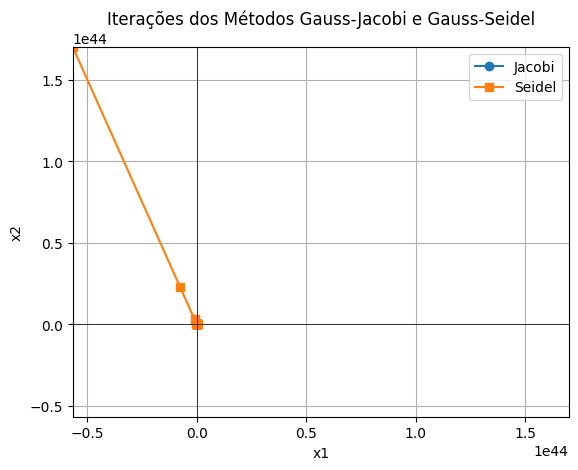

In [ ]:
# Definindo o intervalo e o número de pontos para o gráfico
inicio = min(np.min(iter_jacobi), np.min(iter_seidel)) -0.5
fim = max(np.max(iter_jacobi), np.max(iter_seidel)) +0.5
nro_pts = 10

# Gerando o gráfico
plot_iterations_gs_jacobi(iter_jacobi, iter_seidel, inicio, fim, nro_pts)

Verifica-se que os critérios de convergência não são atendidos. E portanto, o gráfico  de convergência dos métodos iterativos mostra que as soluções calculadas não convergem para um valor estável, o que pode ser evidenciado pela oscilação dos valores ao longo das iterações, sem alcançar uma solução precisa e estável

### b) Permute as equações e aplique analítica e graficamente os métodos Gauss-Jacobi e Gauss-Seidel.

In [ ]:
A = np.array([[3, 1],
              [2, 5]], dtype=float)

b = np.array([2,-3], dtype=float)

# Ponto inicial especificado
x0 = np.copy(b)
# Análise de convergência
is_dd, rho = analyze_convergence(A)
print("A matriz é diagonalmente dominante? {}".format('Sim' if is_dd else 'Não'))
print("Raio espectral da matriz de iteração: {}".format(rho))

A matriz é diagonalmente dominante? Sim
Raio espectral da matriz de iteração: 0.36514837167011077


In [ ]:
# Resolução usando Jacobi
try:
    x, Iter, Info, iter_jacobi = jacobi(A, b, x0,0.0025,100)
    print("Solução x:", x)
    print("Número de iterações:", Iter)
    print("Informação de convergência:", "Convergiu" if Info == 0 else "Não convergiu")
except ValueError as e:
    print("Erro:", e)

Iteração 1: x = [ 1.66666667 -1.4       ], NormaRel = 0.96
Iteração 2: x = [ 1.13333333 -1.26666667], NormaRel = 0.4210526315789474
Iteração 3: x = [ 1.08888889 -1.05333333], NormaRel = 0.19591836734693904
Iteração 4: x = [ 1.01777778 -1.03555556], NormaRel = 0.06866952789699574
Iteração 5: x = [ 1.01185185 -1.00711111], NormaRel = 0.028111273792093536
Iteração 6: x = [ 1.00237037 -1.00474074], NormaRel = 0.009436744323208436
Iteração 7: x = [ 1.00158025 -1.00094815], NormaRel = 0.0037866088156986266
Iteração 8: x = [ 1.00031605 -1.0006321 ], NormaRel = 0.0012633989379551122
Solução x: [ 1.00031605 -1.0006321 ]
Número de iterações: 8
Informação de convergência: Convergiu


In [ ]:
# Aplicando Gauss-Seidel
try:
    x_seidel, Iter_seidel, Info_seidel, iter_seidel = seidel(A, b, x0, Toler=0.0025, IterMax=100)
    print("\nSolução Gauss-Seidel x:", x_seidel)
    print("Número de iterações:", Iter_seidel)
    print("Informação de convergência:", "Convergiu" if Info_seidel == 0 else "Não convergiu")
except ValueError as e:
    print("Erro em Gauss-Seidel:", e)

Iteração 1: x = [ 1.66666667 -1.26666667], NormaRel = 1.0399999999999998
Iteração 2: x = [ 1.08888889 -1.03555556], NormaRel = 0.5306122448979593
Iteração 3: x = [ 1.01185185 -1.00474074], NormaRel = 0.0761346998535871
Iteração 4: x = [ 1.00158025 -1.0006321 ], NormaRel = 0.010255398875850521
Iteração 5: x = [ 1.0002107  -1.00008428], NormaRel = 0.0013692588228324816

Solução Gauss-Seidel x: [ 1.0002107  -1.00008428]
Número de iterações: 5
Informação de convergência: Convergiu


Eixos do Gráfico:

*   **O eixo x (horizontal)** representa os valores da variável x1​.
*    **O eixo y (vertical)** representa os valores da variável x2.




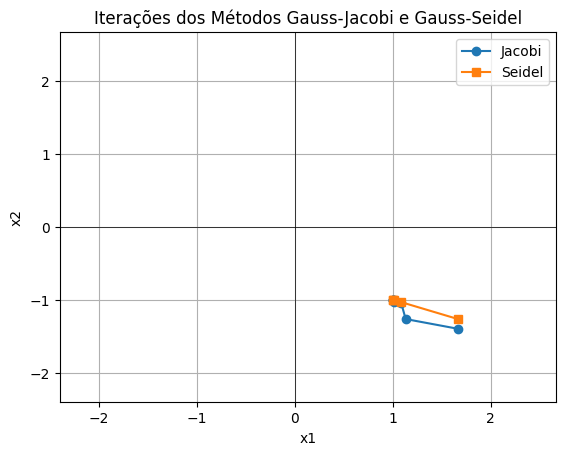

In [ ]:
# Definindo o intervalo e o número de pontos para o gráfico
inicio = min(np.min(iter_jacobi), np.min(iter_seidel)) -1
fim = max(np.max(iter_jacobi), np.max(iter_seidel)) +1
nro_pts = 100

# Gerando o gráfico
plot_iterations_gs_jacobi(iter_jacobi, iter_seidel, inicio, fim, nro_pts)



*   Cada ponto no gráfico representa uma aproximação da solução em uma iteração específica.
*   A linha conectando os pontos mostra a sequência das aproximações, ilustrando como a solução evolui ao longo das iterações.





A trajetória mostra como cada método converge para a solução. Se os pontos de cada método se aproximam de uma coordenada fixa à medida que as iterações aumentam, isso indica que o método está convergindo para a solução correta. No caso [1,-1]

## 5. Resolva o seguinte sistema de equações não linear usando o método iterativode Newton e considere a aproximação inicial com o valor (0 ,0 ,0).

In [ ]:
# Definindo F e JF usando lambdas
F = lambda x: np.array([
    3*np.sin(x[0]) - 4*x[1] - 12*x[2] - 1,    # Equação 1
    4*x[0]**2 - 8*x[1] - 10*x[2] + 5,        # Equação 2
    2*np.exp(x[0]) + 2*x[1] + 3*x[2] - 8      # Equação 3
])

JF = lambda x: np.array([
    [3*np.cos(x[0]), -4, -12],                # Derivadas parciais de f1
    [8*x[0], -8, -10],                        # Derivadas parciais de f2
    [2*np.exp(x[0]), 2, 3]                    # Derivadas parciais de f3
])

# Ponto inicial
x0 = np.array([0.0, 0.0, 0.0])  # Aproximação inicial (0, 0, 0)

# Testando as dimensões de JF(x0)
print("Dimensões de JF(x0):", JF(x0).shape)

TOL = 1e-10
N = 100

# Executando o método de Newton
try:
    sol = newton(F, JF, x0, TOL, N)
    print("Solução aproximada:", sol)
except ValueError as e:
    print(e)

Dimensões de JF(x0): (3, 3)
Solução aproximada: [ 1.06999055  1.76139911 -0.45116738]
